In [38]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

In [39]:
def train_model_custom_convergence(model, x, y):
    num_epochs = 2000
    epoch_list = []
    loss_list = []
    grad_list = []
    epoch_iter = 1
    convergence_threshold = 0.001

    while True:
        predicted_y = model(x)
        loss = calculate_loss(predicted_y, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_list.append(epoch_iter)
        loss_list.append(loss.detach().numpy())

        grad_all = 0.0
        for p in model.parameters():
            grad = 0.0
            if p.grad is not None:
                grad = (p.grad.cpu().data.numpy()**2).sum()
            grad_all += grad
        grad_norm = grad_all ** 0.5
        grad_list.append(grad_norm)

        if epoch_iter % 500 == 0:
            print(f"Epoch: {epoch_iter}, Loss: {loss.item():.5f}, Convergence: {abs(loss_list[-1] - loss_list[-2]):.5f}")

        if epoch_iter >= num_epochs:
            print("Reached max epochs")
            break
        elif loss_list[-1] < convergence_threshold:
            if abs(loss_list[-3] - loss_list[-2]) < 1.0e-05 and abs(loss_list[-2] - loss_list[-1]) < 1.0e-05:
                print("Loss converged:", loss_list[-1])
                break

        epoch_iter += 1

    return epoch_list, loss_list, grad_list

In [40]:
def calculate_loss(predictions, targets):
    return F.mse_loss(predictions, targets)

In [41]:
x_values = np.expand_dims(np.arange(-1.5, 1.5, 0.01), 1)
y_values = np.sin(5 * (np.pi) * x_values) / (5 * (np.pi) * x_values)

In [42]:
x_tensor, y_tensor = torch.tensor(x_values, dtype=torch.float32), torch.tensor(y_values, dtype=torch.float32)


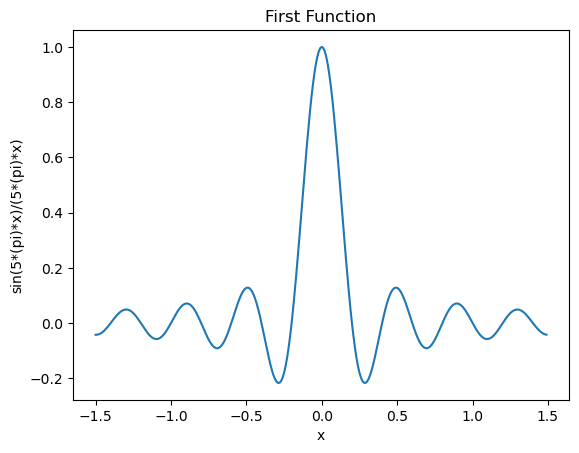

In [43]:
plt.plot(x_values, y_values)
plt.title("First Function")
plt.xlabel("x")
plt.ylabel("sin(5*(pi)*x)/(5*(pi)*x)")
plt.show()

In [44]:
class CustomModel(nn.Module):
    def __init__(self):
        super(CustomModel, self).__init__()
        self.layer1 = nn.Linear(1, 5)
        self.layer2 = nn.Linear(5, 8)
        self.layer3 = nn.Linear(8, 10)
        self.layer4 = nn.Linear(10, 10)
        self.layer5 = nn.Linear(10, 10)
        self.layer6 = nn.Linear(10, 10)
        self.layer7 = nn.Linear(10, 8)
        self.layer8 = nn.Linear(8, 5)
        self.output_layer = nn.Linear(5, 1)

    def forward(self, x):
        x = F.leaky_relu(self.layer1(x))
        x = F.leaky_relu(self.layer2(x))
        x = F.leaky_relu(self.layer3(x))
        x = F.leaky_relu(self.layer4(x))
        x = F.leaky_relu(self.layer5(x))
        x = F.leaky_relu(self.layer6(x))
        x = F.leaky_relu(self.layer7(x))
        x = F.leaky_relu(self.layer8(x))
        x = self.output_layer(x)
        
        return x

In [45]:
model = CustomModel()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)

In [46]:
total_parameters = sum(p.numel() for p in model.parameters())
print(f"Total parameters: {total_parameters}")

Total parameters: 617


In [47]:
epoch_list, loss_list, grad_list = train_model_custom_convergence(model, x_tensor, y_tensor)


Epoch: 500, Loss: 0.06131, Convergence: 0.00000
Epoch: 1000, Loss: 0.06131, Convergence: 0.00000
Epoch: 1500, Loss: 0.06131, Convergence: 0.00000
Epoch: 2000, Loss: 0.06131, Convergence: 0.00000
Reached max epochs


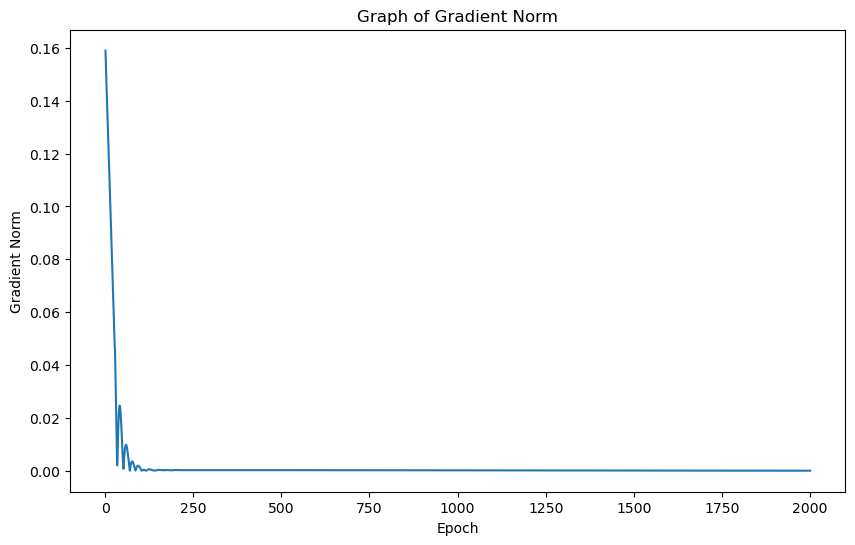

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(epoch_list, grad_list)
plt.title('Graph of Gradient Norm')
plt.xlabel("Epoch")
plt.ylabel("Gradient Norm")
plt.show()

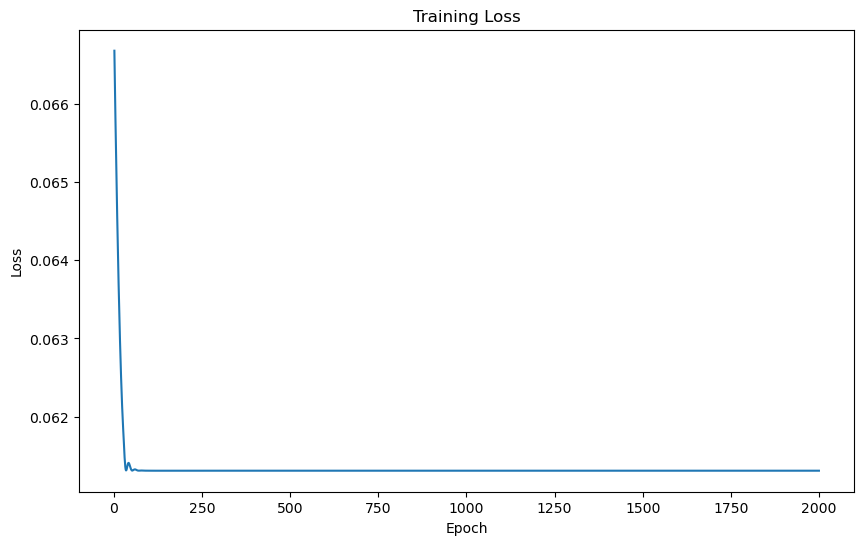

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(epoch_list, loss_list)
plt.title('Training Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

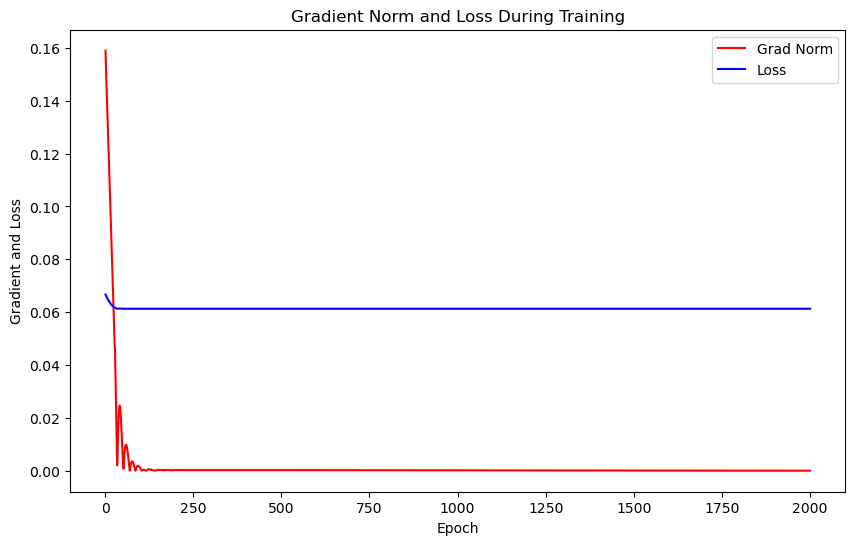

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(epoch_list, grad_list, color='r', label='Grad Norm')
plt.plot(epoch_list, loss_list, color='b', label='Loss')
plt.title('Gradient Norm and Loss During Training')
plt.xlabel("Epoch")
plt.ylabel("Gradient and Loss")
plt.legend()
plt.show()